In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Agenda
- T-Test comparing two means (unpaired, unequal variance)
- Anova
    - One way anova
    - Welch Anova
- Chi-square test
- Applications

### T-Test

In [2]:
url = 'https://raw.githubusercontent.com/skathirmani/datasets/master/HR%20Analytics.csv'
employees = pd.read_csv(url)
employees.shape

(1470, 35)

In [3]:
females = employees[employees['Gender'] == 'Female']['MonthlyIncome']
males = employees[employees['Gender'] == 'Male']['MonthlyIncome']
females.mean()- males.mean()

306.05839002267567

In [4]:
# Ho: Avg income for male and female is same
# Ha: Avg income for male and female is not same

In [5]:
# population should be having from normal distribution
    # modified version of t-test Welch T Test
    # Robust to handle non normal distribution, if sample size is large
# Unpaired
# Unequal variance

In [7]:
#sns.boxplot(data=employees, x='Gender', y='MonthlyIncome')

In [9]:
t, pvalue = st.ttest_ind(males, females)

In [11]:
## probability of the means being equal ->m1 = m2
## 5% or 10%
## 95% confidence - 5% -> 0.05

In [12]:
pvalue

0.22218303455087898

In [13]:
if pvalue < 0.05:
    print('Reject null hypothesis')
else:
    print('Accept null hypothesis')

Accept your null hypothesis


In [16]:
employees['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

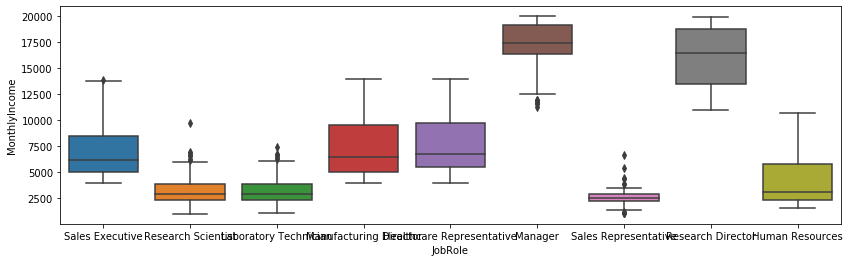

In [19]:
plt.figure(figsize=(14,4))
sns.boxplot(data=employees, x='JobRole', y='MonthlyIncome')

In [21]:
employees.groupby('JobRole')['MonthlyIncome'].mean().sort_values()

JobRole
Sales Representative          2626.000000
Laboratory Technician         3237.169884
Research Scientist            3239.972603
Human Resources               4235.750000
Sales Executive               6924.279141
Manufacturing Director        7295.137931
Healthcare Representative     7528.763359
Research Director            16033.550000
Manager                      17181.676471
Name: MonthlyIncome, dtype: float64

In [28]:
## sales_representative & lab tech -> 5%
## lab tech & research scientist -> 5%

In [ ]:
## sales_representative & manager

In [23]:
sales = employees[employees['JobRole'] == 'Sales Representative']['MonthlyIncome']
manager = employees[employees['JobRole'] == 'Manager']['MonthlyIncome']
sales.shape, manager.shape

((83,), (102,))

In [26]:
t, pvalue = st.ttest_ind(sales, manager, equal_var=False)
print(pvalue)
if pvalue < 0.05:
    print('Reject null hypothesis')
else:
    print('Accept null hypothesis')

5.446090443478108e-97
Reject null hypothesis


### ANOVA: Analysis of Variance

In [ ]:
### F -Distribution
### Chi-square distribution

In [35]:
### Chi-square distribution
sample1 = pd.Series(np.random.normal(loc=5, scale=2, size=5000))
sample2 = pd.Series(np.random.normal(loc=5, scale=2, size=5000))
sample3 = pd.Series(np.random.normal(loc=5, scale=2, size=5000))
sample4 = pd.Series(np.random.normal(loc=5, scale=2, size=5000))
sample5 = pd.Series(np.random.normal(loc=5, scale=2, size=5000))

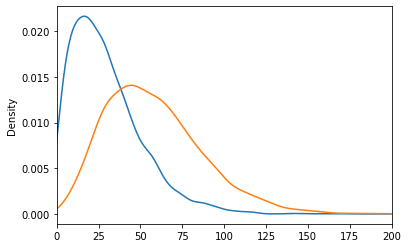

In [36]:
np.square(sample1).plot.kde(xlim=(0, 200))
(np.square(sample1)+np.square(sample2)).plot.kde(xlim=(0, 200))

In [86]:
population = pd.Series(np.random.normal(loc=10, scale=2, size=100000))
sample1 = population.sample(1000)
sample2 = population.sample(1000)
sample3 = population.sample(1000)
sample4 = pd.Series(np.random.normal(loc=15, scale=2, size=100000))
sample1.mean(), sample2.mean(), sample3.mean(), sample4.mean()

(9.917007106901126, 10.010448174214195, 10.054212262455412, 15.00885721171354)

In [88]:
r = 3
n1 = len(sample1)
n2 = len(sample2)
n3 = len(sample3)
x1_bar = sample1.mean()
x2_bar = sample2.mean()
x3_bar = sample3.mean()
sample_all = np.hstack([sample1, sample2, sample3])
xbar = sample_all.mean()

ssf = np.sum([n1*np.square(x1_bar-xbar),
             n2*np.square(x2_bar-xbar),
             n3*np.square(x3_bar-xbar)])
bwt_var = ssf/(r-1)

sse = np.sum(np.hstack([np.square(sample1-x1_bar),
np.square(sample2-x2_bar),
np.square(sample3-x3_bar)]))
within_var = sse / (len(sample_all)-r)

fstatistic = bwt_var / within_var
#fstatistic

In [ ]:
st.f_oneway()

In [99]:
f, pvalue = st.f_oneway(sample1, sample2, sample3, sample4)
f, pvalue

(6151.5835407392, 0.0)

In [91]:
if pvalue>0.05:
    print('All three samples are coming from same population, hence accept null hypothesis', )
else:
    print('One of the sample is coming from different population')

One of the sample is coming from different population


In [90]:
if pvalue>0.05:
    print('Accept null hypothesis', )
else:
    print('Reject null hypothesis')

Reject null hypothesis


In [76]:
'''
population = pd.Series(np.random.normal(loc=10, scale=2, size=100000))

sample1 = population.sample(100)
sample2 = population.sample(100)
sample3 = pd.Series(np.random.normal(loc=15, scale=2, size=100000))
sample1.mean(), sample2.mean(), sample3.mean()
population.plot.kde(xlim=(3,22))
sample1.plot.kde(xlim=(3, 22))
sample2.plot.kde(xlim=(3,22))
sample3.plot.kde(xlim=(3,22))
plt.legend(['pop', 's1', 's2', 's3'])
'''

"\npopulation = pd.Series(np.random.normal(loc=10, scale=2, size=100000))\n\nsample1 = population.sample(100)\nsample2 = population.sample(100)\nsample3 = pd.Series(np.random.normal(loc=15, scale=2, size=100000))\nsample1.mean(), sample2.mean(), sample3.mean()\npopulation.plot.kde(xlim=(3,22))\nsample1.plot.kde(xlim=(3, 22))\nsample2.plot.kde(xlim=(3,22))\nsample3.plot.kde(xlim=(3,22))\nplt.legend(['pop', 's1', 's2', 's3'])\n"

### Welch ANOVA

In [93]:
#!pip install pingouin

In [100]:
from pingouin import welch_anova

fresults = welch_anova(data=employees,
                       dv='MonthlyIncome',
                       between='Gender'
                      )
fresults

,Source,ddof1,ddof2,F,p-unc,np2
0,Gender,1,1261.546661,1.493924,0.221837,0.001015


In [123]:
df['Age'].nunique()

43

In [96]:
### Gender vs MonthlyIncome
## pvalue >0.05
## accept null hypothesis
## avg income of male is equal to avg income of female
## Gender is not influencing monthlyincome

In [97]:
fresults = welch_anova(data=employees,
                       dv='MonthlyIncome',
                       between='JobRole'
                      )
fresults

,Source,ddof1,ddof2,F,p-unc,np2
0,JobRole,8,387.69168,752.257163,7.875237e-231,0.816058


In [ ]:
### JobRole vs MonthlyIncome
## pvalue >0.05: False
## reject null hypothesis
## avg income between jobrole is not same.
## Alteast one of the jobrole's avg income is different
## JobRole is influencing monthlyincome

In [ ]:
### Exercises
### Using employees dataset
### for these numerical variables [MonthlyIncome]
### Identify which categorical variables influences monthlyincome

In [120]:
df['Over18'].nunique()

1

In [129]:
df = employees

def get_anova_results(df, pvalue_thresh=0.05):
    num_col = 'MonthlyIncome'
    cat_cols = df.dtypes[df.dtypes==object].index.tolist()
    #num_cols = np.setdiff1d([df.columns, cat_cols])
    #num_cols = df.describe().columns
    num_cols = df._get_numeric_data().columns
    thresh = 0.05
    results = []
    for num_col in num_cols:
        for cat_col in cat_cols:
            if df[cat_col].nunique()>1:
                fresults = welch_anova(data=df,
                                   dv=num_col,
                                   between=cat_col
                                  )
                pvalue = fresults.loc[0, 'p-unc']
                if pvalue < thresh:
                     results.append((cat_col, num_col))
    df_results = pd.DataFrame(results, columns=['categorical',
                                                'numerical'])
    return df_results

,categorical,numerical
0,JobRole,Age
1,MaritalStatus,Age


In [ ]:
# numerical-> nunique/nrows ->
# nunique is very & nunique/nrows is very small

In [130]:
### kwargs

In [135]:
#sample3

In [136]:
def one_way_anova(sample1, sample2, sample3):
    print(len(sample1), len(sample2), len(sample3))
one_way_anova(sample1, sample2, sample3)

1000 1000 1000


In [142]:
def one_way_anova(x):
    print(len(x))
    print(len(x[0]), len(x[1]))
one_way_anova((sample1, sample2, sample3))

3
1000 1000


In [149]:
def one_way_anova(*args):
    print(len(args[3]))
one_way_anova(sample1, sample2, sample3, sample4)

100000


In [152]:
def one_way_anova(**args):
    print(args)
one_way_anova(s1 = [4], s2=[5], s3=[6], s4=[7], s5=[9])

{'s1': [4], 's2': [5], 's3': [6], 's4': [7], 's5': [9]}


In [156]:
inp = (sample1, sample2, sample3)
st.f_oneway(*inp)

F_onewayResult(statistic=1.2488163007868809, pvalue=0.2869933535180164)

In [170]:
females = employees[employees['Gender'] == 'Female']['MonthlyIncome']
males = employees[employees['Gender'] == 'Male']['MonthlyIncome']
st.f_oneway(females, males)

F_onewayResult(statistic=1.4914802153292723, pvalue=0.22218303455087515)

In [169]:
employees['JobRole']

inp = []
for level in employees['JobRole'].unique():
    sample = employees[employees['JobRole'] == level]
    inp.append(sample['MonthlyIncome'])
st.f_oneway(,)

F_onewayResult(statistic=810.2140539160126, pvalue=0.0)

In [172]:
employees['Age'].nunique()

43

In [ ]:
18-30
31-45
46-60
60+

In [171]:
s1 = age18
s2 = age19
s3


...

0       41
1       49
2       37
3       33
4       27
        ..
1465    36
1466    39
1467    27
1468    49
1469    34
Name: Age, Length: 1470, dtype: int64